In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import seaborn as sns

In [91]:
X_train, X_test, y_train, y_test = joblib.load('../../preprocessing/classification_data.joblib')
models_s = joblib.load('stabla.joblib')
models_knn = joblib.load('knn.joblib')

In [93]:
models_s

[DecisionTreeClassifier(random_state=22),
 DecisionTreeClassifier(class_weight='balanced', max_depth=25, random_state=22),
 RandomForestClassifier(),
 RandomForestClassifier(n_estimators=300)]

In [94]:
models_knn

[KNeighborsClassifier(), KNeighborsClassifier(n_neighbors=1, p=1)]

In [119]:
def matrica_konfuzije(y_real, y_pred, model_name, string):
    cm = confusion_matrix(y_real, y_pred)

    plt.figure(figsize=(4, 3))
    sns.set(font_scale=1)

    sns.heatmap(
        cm,
        annot=True,
        fmt='d',
        cmap='Reds',
        linewidths=0.5,
        cbar=False,
        square=True,
        xticklabels=['Bronze', 'Gold', 'No Medal', 'Silver'],
        yticklabels=['Bronze', 'Gold', 'No Medal', 'Silver'],
    )

    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'{model_name} {string} Confusion Matrix')
    plt.show()

In [120]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

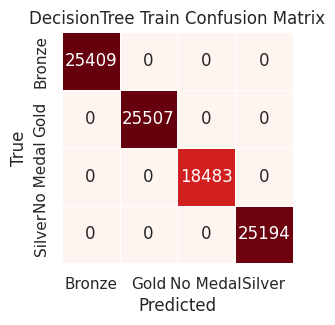

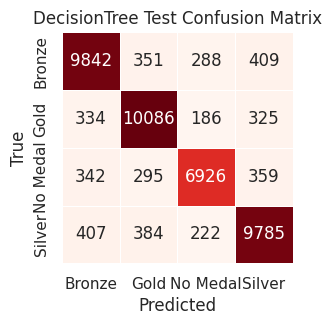

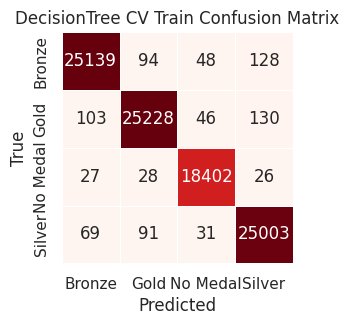

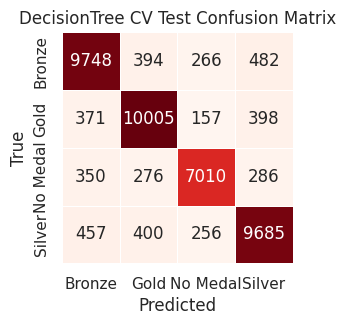

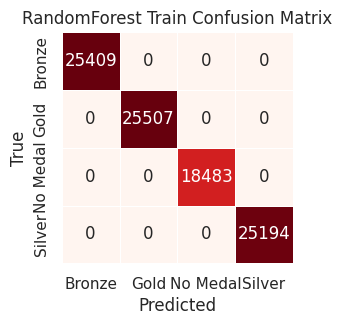

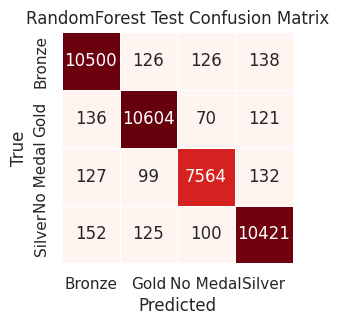

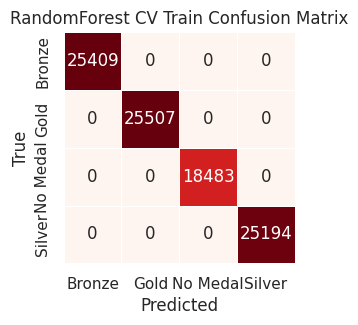

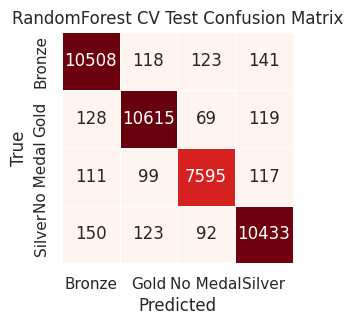

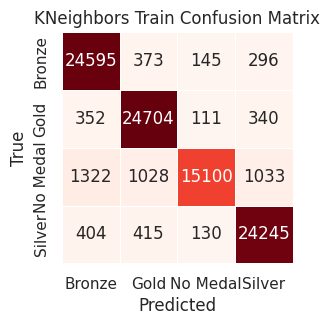

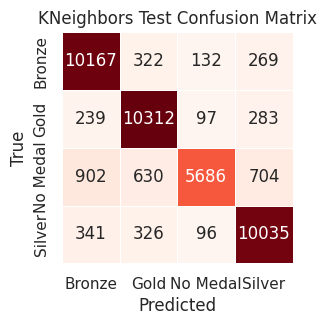

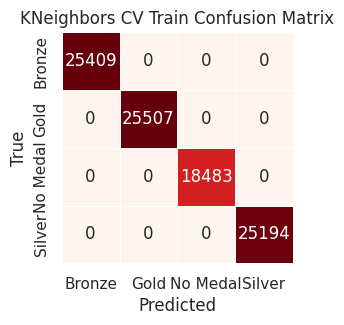

In [ ]:
for model, model_name in zip(models, model_names):
    y_pred_train = model.predict(X_train)
    matrica_konfuzije(y_train, y_pred_train, model_name, 'Train')
    
    y_pred_test = model.predict(X_test)
    matrica_konfuzije(y_test, y_pred_test, model_name, 'Test')
    
    
    

In [104]:
accuracy_train = []
precision_train = []
recall_train = []
f1_train = []
accuracy_test = []
precision_test = []
recall_test = []
f1_test = []

for model, model_name in zip(models, model_names):
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    accuracy_train.append(accuracy_score(y_pred_train, y_train))
    precision_train.append(precision_score(y_pred_train, y_train, average='macro'))
    recall_train.append(recall_score(y_pred_train, y_train, average='macro'))
    f1_train.append(f1_score(y_pred_train, y_train, average='macro'))
    
    accuracy_test.append(accuracy_score(y_pred_test, y_test))
    precision_test.append(precision_score(y_pred_test, y_test, average='macro'))
    recall_test.append(recall_score(y_pred_test, y_test, average='macro'))
    f1_test.append(f1_score(y_pred_test, y_test, average='macro'))
    

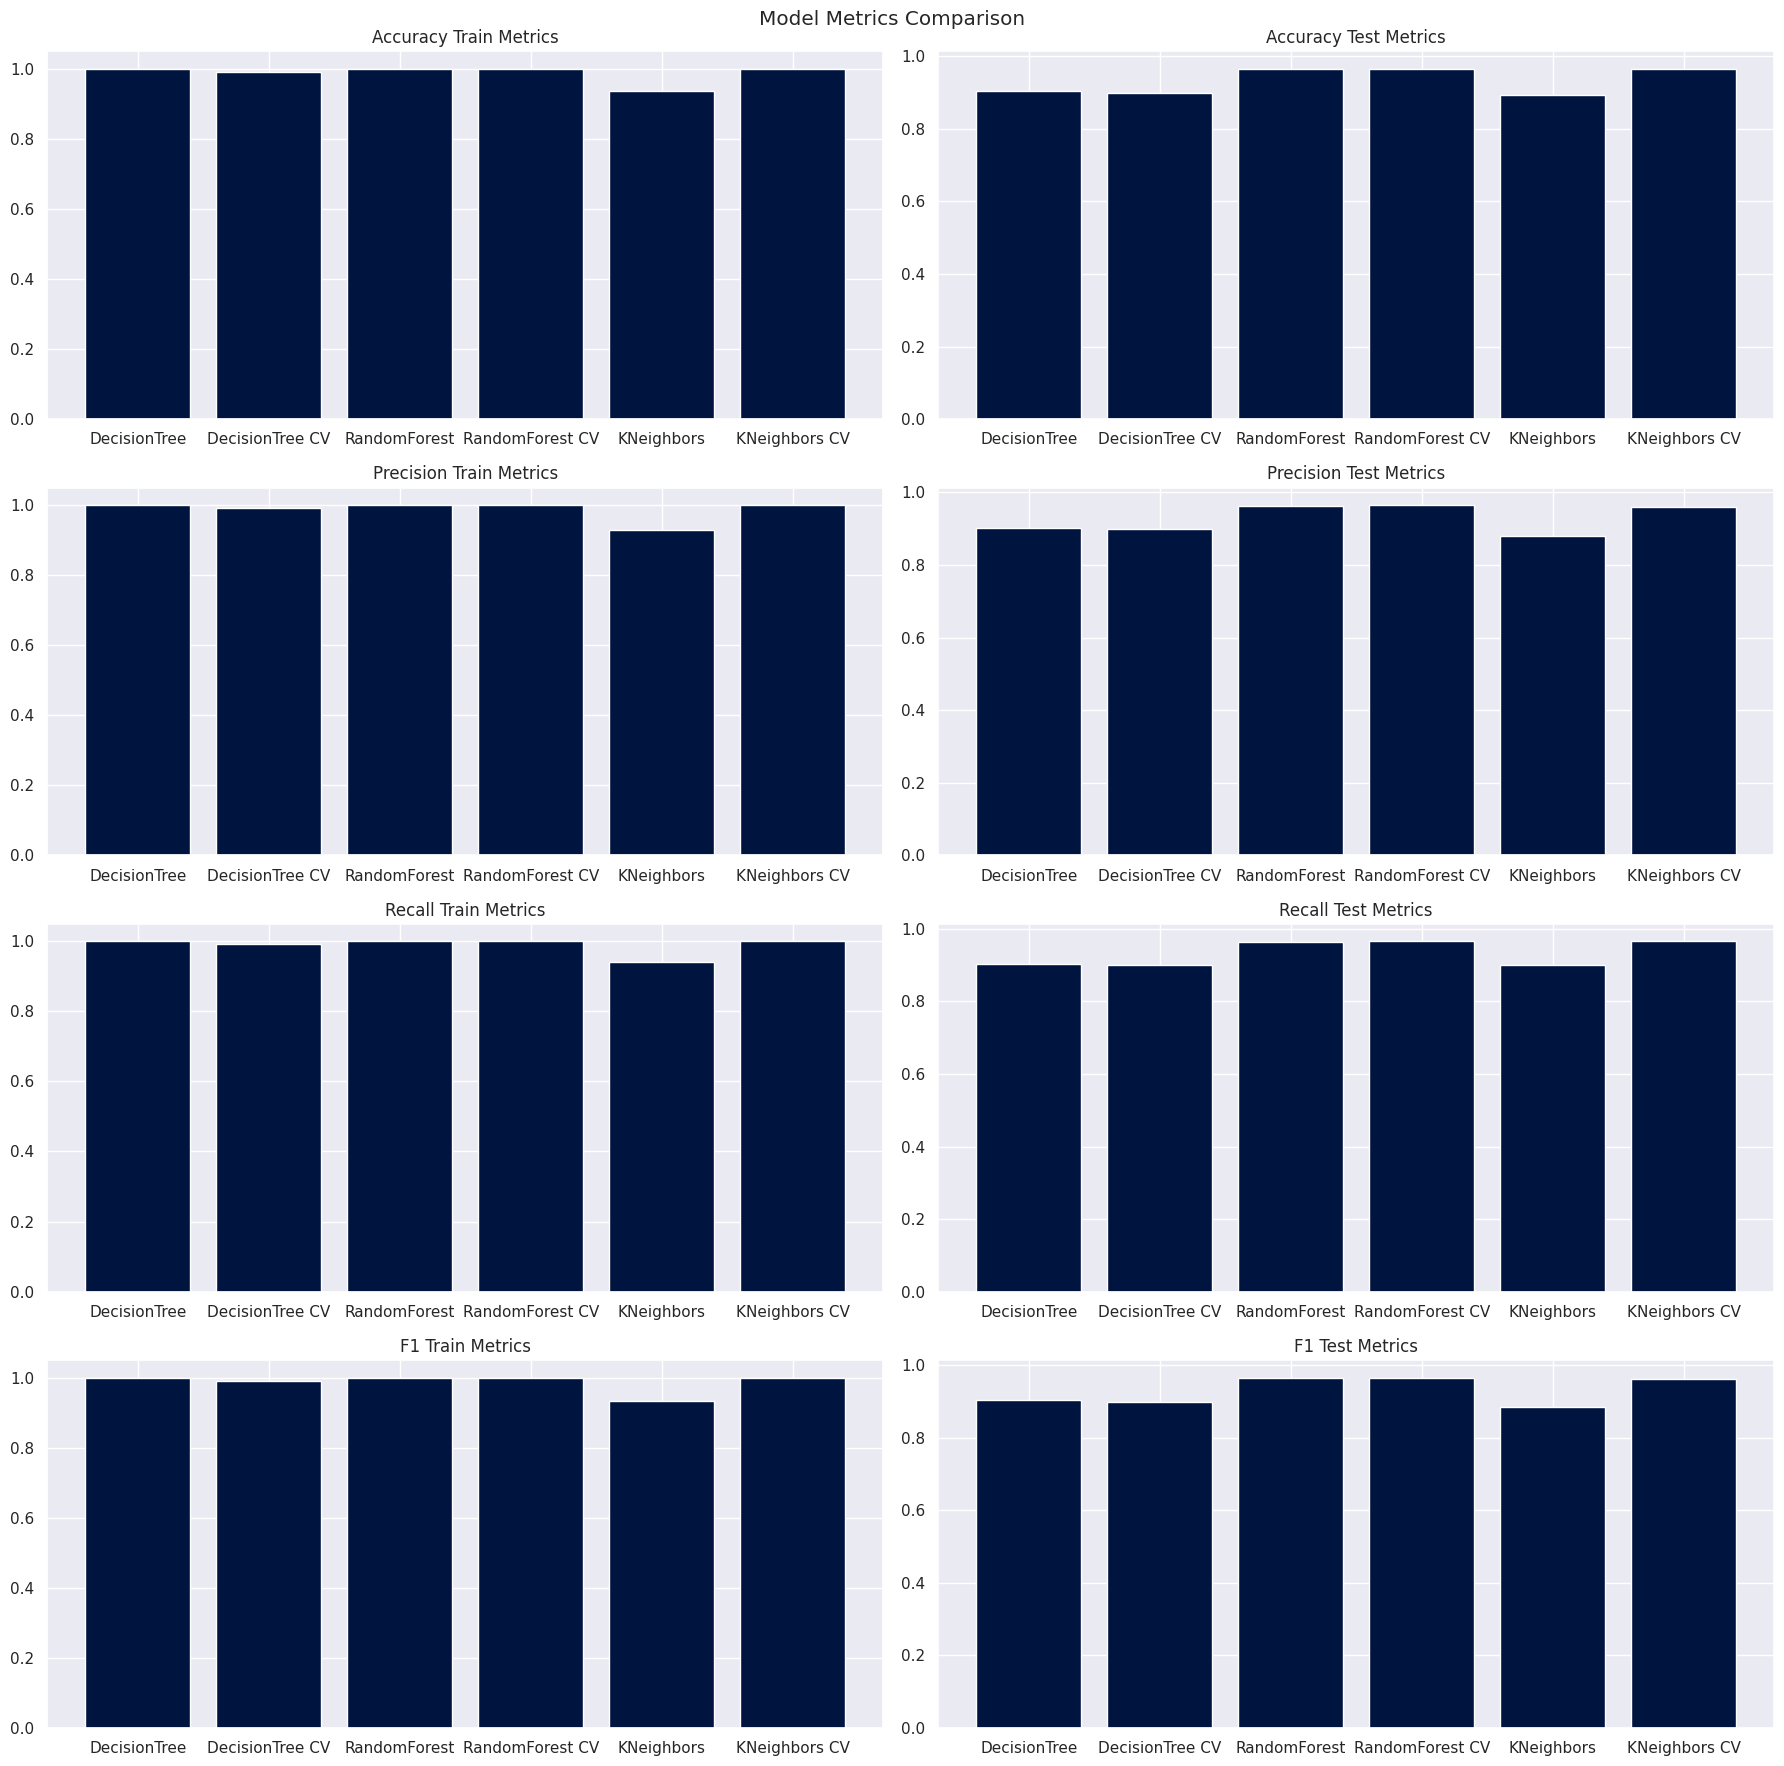

In [125]:
fir, axs = plt.subplots(4, 2, figsize = (18, 18), squeeze=False)

metrics = [accuracy_train, accuracy_test, precision_train, precision_test, recall_train, recall_test, f1_train, f1_test]
metric_names = ['Accuracy Train', 'Accuracy Test', 'Precision Train', 'Precision Test', 'Recall Train', 'Recall Test', 'F1 Train', 'F1 Test']
for ax, metric, metric_name in zip(axs.flatten(), metrics, metric_names):
    ax.bar(model_names, metric, color = '#001440')
    ax.set_title(f'{metric_name} Metrics')

plt.suptitle('Model Metrics Comparison')
plt.tight_layout()
plt.show()

## ROC Kriva

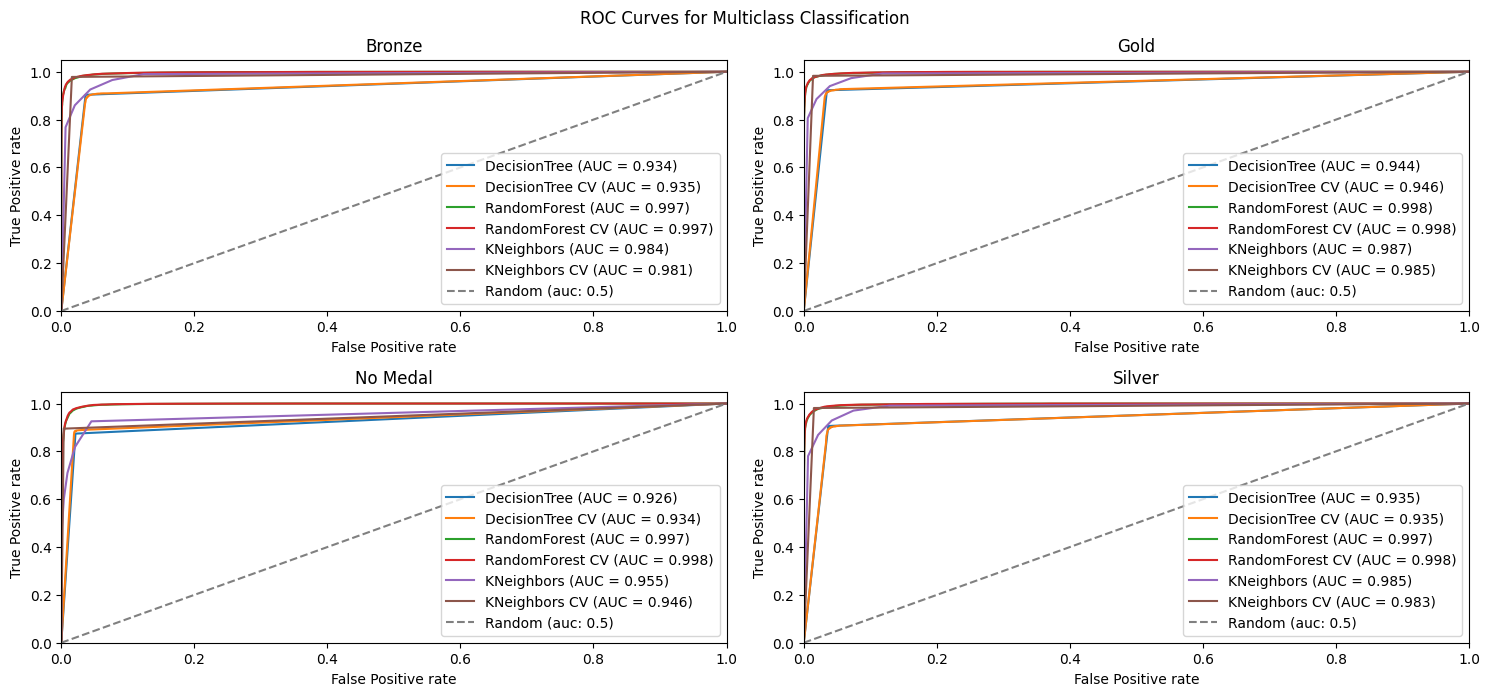

In [25]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

class_names = ['Bronze', 'Gold', 'No Medal', 'Silver']

y_train_bin = label_binarize(y_train, classes = ['Bronze', 'Gold', 'No_Medal', 'Silver'])
y_test_bin = label_binarize(y_test, classes = ['Bronze', 'Gold', 'No_Medal', 'Silver'])

models = models_s + models_knn
model_names = ['DecisionTree', 'DecisionTree CV', 'RandomForest', 'RandomForest CV', 'KNeighbors', 'KNeighbors CV']

num_rows = 3
num_cols = 2

plt.figure(figsize=(15, 10))

for class_index in range(y_train_bin.shape[1]):
    plt.subplot(num_rows, num_cols, class_index + 1)
    plt.title(class_names[class_index])

    for model, model_name in zip(models, model_names):
        y_pred = model.predict_proba(X_test)

        fpr, tpr, _ = roc_curve(y_test_bin[:, class_index],  y_pred[:, class_index])
        roc_auc = auc(fpr, tpr)

        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.3f})')

    plt.plot([0, 1], [0, 1], label='Random (auc: 0.5)', color='grey', linestyle='--')

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive rate')
    plt.ylabel('True Positive rate')
    plt.legend()

plt.suptitle('ROC Curves for Multiclass Classification')
plt.tight_layout()
plt.show()
